By Drilon & Chia-Hua

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)
x_train.shape[1:]

(32, 32, 3)

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [6]:
log = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 8s 8ms/step - loss: 1.4450 - accuracy: 0.4791 - val_loss: 1.1484 - val_accuracy: 0.5997
Epoch 2/20
625/625 [==============================] - 4s 7ms/step - loss: 1.0230 - accuracy: 0.6406 - val_loss: 0.9814 - val_accuracy: 0.6565
Epoch 3/20
625/625 [==============================] - 4s 7ms/step - loss: 0.8580 - accuracy: 0.6984 - val_loss: 0.8523 - val_accuracy: 0.7080
Epoch 4/20
625/625 [==============================] - 4s 7ms/step - loss: 0.7441 - accuracy: 0.7396 - val_loss: 0.8906 - val_accuracy: 0.6951
Epoch 5/20
625/625 [==============================] - 4s 7ms/step - loss: 0.6499 - accuracy: 0.7724 - val_loss: 0.8473 - val_accuracy: 0.7115
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.5544 - accuracy: 0.8065 - val_loss: 0.8417 - val_accuracy: 0.7181
Epoch 7/20
625/625 [==============================] - 4s 7ms/step - loss: 0.4621 - accuracy: 0.8383 - val_loss: 0.8289 - val_accuracy: 0.7313
Epoch 

In [7]:
def plot_training(model_log):
  f = plt.figure(figsize=(12,4))
  ax1 = f.add_subplot(121)
  ax2 = f.add_subplot(122)
  ax1.plot(model_log.history['loss'], label='Training loss')
  ax1.plot(model_log.history['val_loss'], label='Testing loss')
  ax1.legend()
  ax1.grid()
  ax2.plot(model_log.history['accuracy'], label='Training acc')
  ax2.plot(model_log.history['val_accuracy'], label='Testing acc')
  ax2.legend()
  ax2.grid()

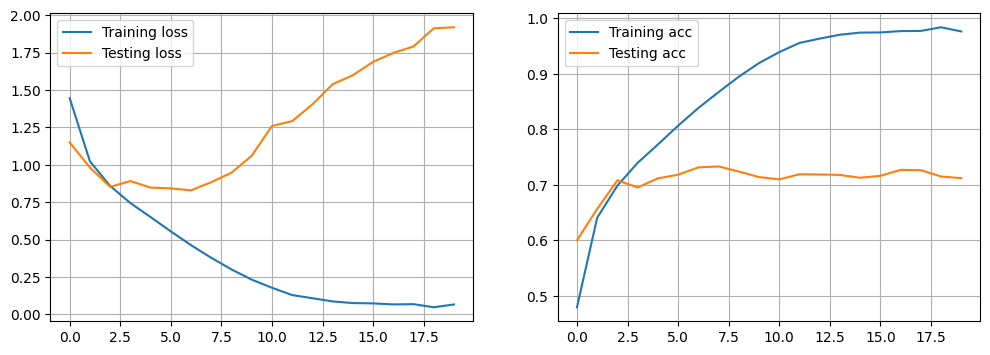

In [8]:
plot_training(log)

## Changing activation to tanh

Epoch 1/20
625/625 [==============================] - 7s 8ms/step - loss: 1.3631 - accuracy: 0.5245 - val_loss: 1.1109 - val_accuracy: 0.6163
Epoch 2/20
625/625 [==============================] - 5s 7ms/step - loss: 1.0132 - accuracy: 0.6480 - val_loss: 1.0141 - val_accuracy: 0.6479
Epoch 3/20
625/625 [==============================] - 4s 7ms/step - loss: 0.8779 - accuracy: 0.6944 - val_loss: 0.9209 - val_accuracy: 0.6780
Epoch 4/20
625/625 [==============================] - 5s 7ms/step - loss: 0.7389 - accuracy: 0.7437 - val_loss: 0.8802 - val_accuracy: 0.7045
Epoch 5/20
625/625 [==============================] - 4s 7ms/step - loss: 0.5915 - accuracy: 0.7977 - val_loss: 0.8842 - val_accuracy: 0.7046
Epoch 6/20
625/625 [==============================] - 4s 7ms/step - loss: 0.4354 - accuracy: 0.8550 - val_loss: 0.9360 - val_accuracy: 0.6974
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.2861 - accuracy: 0.9118 - val_loss: 1.0042 - val_accuracy: 0.6936
Epoch 

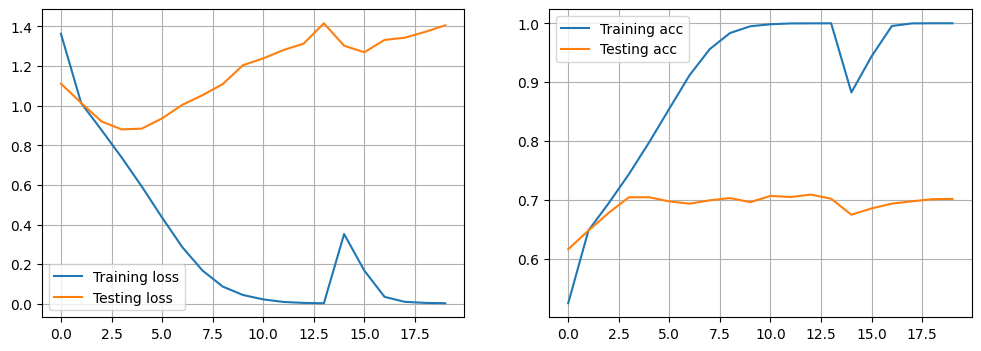

In [9]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='tanh', input_shape=(32,32,3)),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='tanh'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log2 = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)
plot_training(log2)

## Adding Batchnormalization

Epoch 1/20
625/625 [==============================] - 8s 9ms/step - loss: 1.4498 - accuracy: 0.4893 - val_loss: 1.2768 - val_accuracy: 0.5495
Epoch 2/20
625/625 [==============================] - 5s 9ms/step - loss: 1.0906 - accuracy: 0.6114 - val_loss: 1.0998 - val_accuracy: 0.6089
Epoch 3/20
625/625 [==============================] - 5s 9ms/step - loss: 0.9378 - accuracy: 0.6682 - val_loss: 1.0525 - val_accuracy: 0.6318
Epoch 4/20
625/625 [==============================] - 6s 9ms/step - loss: 0.8283 - accuracy: 0.7086 - val_loss: 0.9352 - val_accuracy: 0.6771
Epoch 5/20
625/625 [==============================] - 5s 9ms/step - loss: 0.7340 - accuracy: 0.7433 - val_loss: 0.9107 - val_accuracy: 0.6810
Epoch 6/20
625/625 [==============================] - 6s 9ms/step - loss: 0.6471 - accuracy: 0.7720 - val_loss: 0.9670 - val_accuracy: 0.6749
Epoch 7/20
625/625 [==============================] - 5s 9ms/step - loss: 0.5546 - accuracy: 0.8061 - val_loss: 0.8762 - val_accuracy: 0.6989
Epoch 

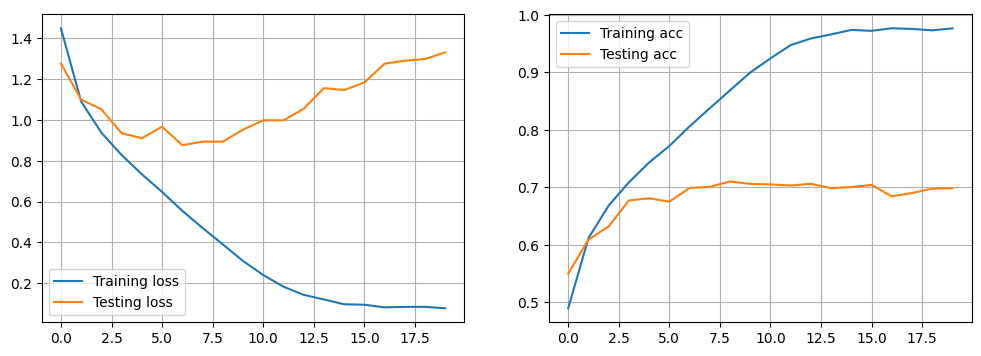

In [10]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation=None, input_shape=(32,32,3)),

  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.tanh),

  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation=None),

  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.tanh),

  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation=None),

  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.tanh),

  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='tanh'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log3 = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)
plot_training(log3)

## Adding Dropout

Epoch 1/20
625/625 [==============================] - 9s 8ms/step - loss: 1.4328 - accuracy: 0.4936 - val_loss: 1.1503 - val_accuracy: 0.5973
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 1.0740 - accuracy: 0.6297 - val_loss: 1.0303 - val_accuracy: 0.6401
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9526 - accuracy: 0.6678 - val_loss: 0.9660 - val_accuracy: 0.6650
Epoch 4/20
625/625 [==============================] - 5s 7ms/step - loss: 0.8634 - accuracy: 0.6987 - val_loss: 0.9278 - val_accuracy: 0.6748
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.7704 - accuracy: 0.7292 - val_loss: 0.8875 - val_accuracy: 0.6948
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6749 - accuracy: 0.7639 - val_loss: 0.8727 - val_accuracy: 0.6985
Epoch 7/20
625/625 [==============================] - 5s 7ms/step - loss: 0.5889 - accuracy: 0.7935 - val_loss: 0.8763 - val_accuracy: 0.7037
Epoch 

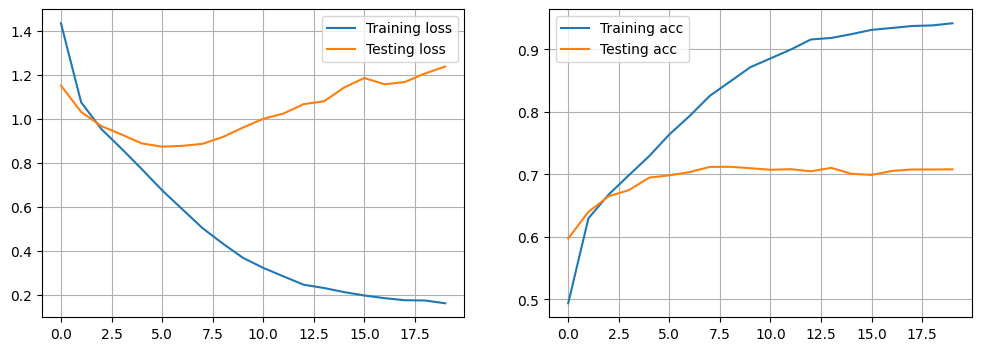

In [11]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='tanh', input_shape=(32,32,3)),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),

  keras.layers.Dropout(0.1),
  keras.layers.Dense(256, activation='tanh'),

  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log4 = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)
plot_training(log4)

Epoch 1/20
625/625 [==============================] - 9s 10ms/step - loss: 1.5594 - accuracy: 0.4527 - val_loss: 1.3169 - val_accuracy: 0.5321
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 1.1781 - accuracy: 0.5822 - val_loss: 1.1530 - val_accuracy: 0.5903
Epoch 3/20
625/625 [==============================] - 6s 9ms/step - loss: 1.0162 - accuracy: 0.6385 - val_loss: 0.9931 - val_accuracy: 0.6490
Epoch 4/20
625/625 [==============================] - 6s 9ms/step - loss: 0.9063 - accuracy: 0.6804 - val_loss: 0.9360 - val_accuracy: 0.6724
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 0.8341 - accuracy: 0.7082 - val_loss: 0.9263 - val_accuracy: 0.6768
Epoch 6/20
625/625 [==============================] - 5s 9ms/step - loss: 0.7676 - accuracy: 0.7310 - val_loss: 0.9146 - val_accuracy: 0.6794
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 0.7124 - accuracy: 0.7482 - val_loss: 0.8555 - val_accuracy: 0.7067
Epoch

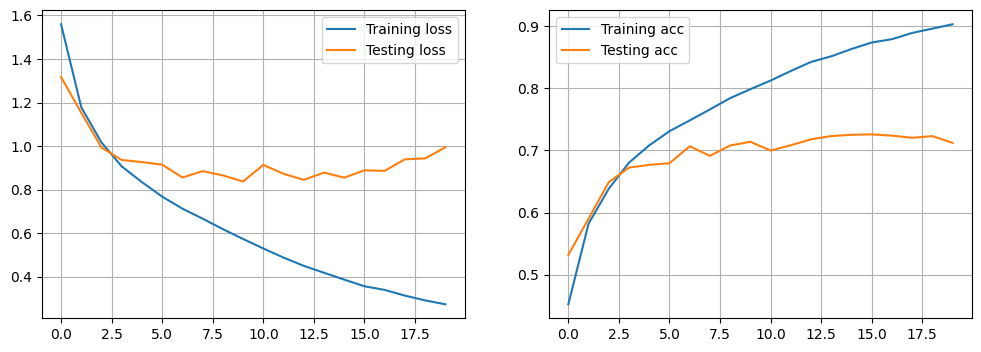

In [16]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation=None, input_shape=(32,32,3)),

  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.tanh),

  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation=None),

  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.tanh),

  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation=None),

  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.tanh),

  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),

  keras.layers.Dropout(0.1),
  keras.layers.Dense(256, activation='tanh'),

  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log5 = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)
plot_training(log5)

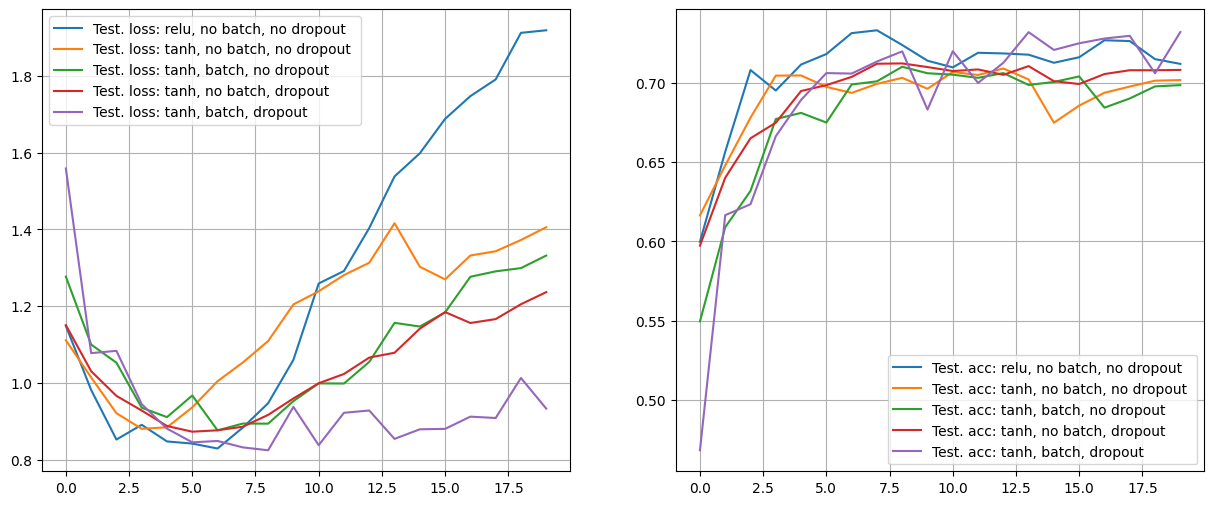

In [13]:
f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(log.history['val_loss'], label='Test. loss: relu, no batch, no dropout')
ax1.plot(log2.history['val_loss'], label='Test. loss: tanh, no batch, no dropout ')
ax1.plot(log3.history['val_loss'], label='Test. loss: tanh, batch, no dropout')
ax1.plot(log4.history['val_loss'], label='Test. loss: tanh, no batch, dropout')
ax1.plot(log5.history['val_loss'], label='Test. loss: tanh, batch, dropout')

ax1.legend()
ax1.grid()

ax2.plot(log.history['val_accuracy'], label='Test. acc: relu, no batch, no dropout')
ax2.plot(log2.history['val_accuracy'], label='Test. acc: tanh, no batch, no dropout ')
ax2.plot(log3.history['val_accuracy'], label='Test. acc: tanh, batch, no dropout')
ax2.plot(log4.history['val_accuracy'], label='Test. acc: tanh, no batch, dropout')
ax2.plot(log5.history['val_accuracy'], label='Test. acc: tanh, batch, dropout')

ax2.legend()
ax2.grid()

Epoch 1/30
625/625 [==============================] - 9s 10ms/step - loss: 1.5529 - accuracy: 0.4541 - val_loss: 1.2461 - val_accuracy: 0.5516
Epoch 2/30
625/625 [==============================] - 6s 9ms/step - loss: 1.1847 - accuracy: 0.5770 - val_loss: 1.0624 - val_accuracy: 0.6249
Epoch 3/30
625/625 [==============================] - 6s 10ms/step - loss: 1.0200 - accuracy: 0.6416 - val_loss: 0.9747 - val_accuracy: 0.6529
Epoch 4/30
625/625 [==============================] - 6s 9ms/step - loss: 0.9186 - accuracy: 0.6751 - val_loss: 0.9796 - val_accuracy: 0.6520
Epoch 5/30
625/625 [==============================] - 6s 9ms/step - loss: 0.8449 - accuracy: 0.7028 - val_loss: 0.9525 - val_accuracy: 0.6672
Epoch 6/30
625/625 [==============================] - 6s 9ms/step - loss: 0.7820 - accuracy: 0.7243 - val_loss: 0.8835 - val_accuracy: 0.6886
Epoch 7/30
625/625 [==============================] - 6s 10ms/step - loss: 0.7255 - accuracy: 0.7456 - val_loss: 0.8640 - val_accuracy: 0.6976
Epo

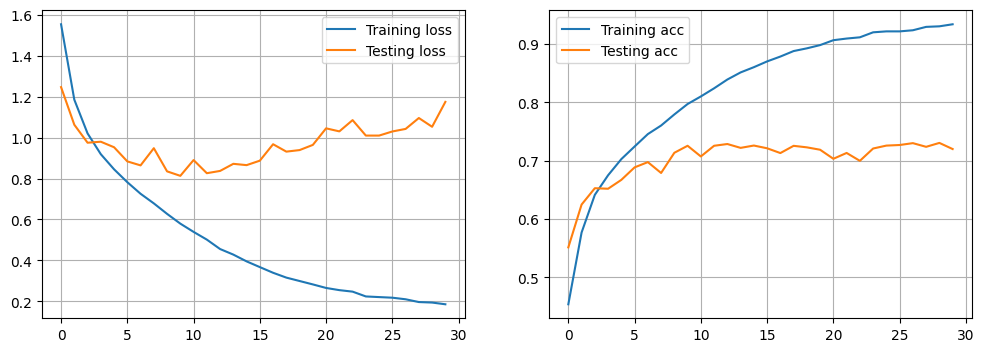

In [15]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation=None, input_shape=(32,32,3)),

  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.tanh),

  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation=None),

  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.tanh),

  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation=None),

  keras.layers.BatchNormalization(),
  keras.layers.Activation(keras.activations.tanh),

  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),

  keras.layers.Dropout(0.1),
  keras.layers.Dense(256, activation='tanh'),

  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
final_log = model.fit(x_train, y_train, batch_size=64, epochs=30, verbose=1, validation_split=0.2)
plot_training(final_log)

This was just a test to see if the best performing model would increase accuracy if we train it for longer.

In our analysis, the integration of batch normalization and dropout with the tanh activation function appeared as the best configuration, significantly improving the model's testing accuracy and maintaining a lower loss. This suggests that the combined regularization effects of batch normalization and dropout are beneficial for the tanh activation, potentially mitigating overfitting and improving generalization.

Interestingly, we observed high accuracy alongside high loss in a test set, with a ReLU-activated model lacking regularization. This implies the model accurately predicts certain instances with high confidence but errors significantly on others.